# QuadPay: data_viz

#### Overview
__Goal.__ Create data visualizations that allow for a deeper understanding of the features and their relationship to the outcome variables. 

__Approach__<br>



<br>

#### Resources
+ [QuadPay Machine Learning Engineer Assignment](https://docs.google.com/document/d/1DUixAKGXQqFwhAIL7Sk-yhE_TqM7TovFnMyztVbMGNM/edit)
+ [Zip Code Data](https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2016-zip-code-data-soi)
+ [Chartify](https://github.com/spotify/chartify). A public python package build and often-used at Spotify. 

<br>


<br>

### Get data

In [1]:
import sys
sys.path.append('/home/jovyan/quadpay_analysis/src')
# sys.path.append('/home/jovyan/quadpay_analysis/src/chromedriver')


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ORDERS_DATA = '../data/transformed_orders.csv'


In [3]:
# help(chartify)

df = pd.read_csv(ORDERS_DATA)
df = df.drop(labels='Unnamed: 0', axis='columns')
df.head()


,order_id,customer_id,merchant_id,order_amount,checkout_started_at,credit_decision_started_at,approved_for_installments,customer_credit_score,customer_age,customer_billing_zip,...,paid_installment_3_cum_avg.1,paid_installment_4_cum_avg.1,merchant_order_amount_cum_sum,merchant_orders_cum_sum,merchant_order_amount_cum_avg,merchant_paid_installment_1_ratio,merchant_paid_installment_2_ratio,merchant_paid_installment_3_ratio,merchant_paid_installment_4_ratio,order_amount_to_merchant_avg_ratio
0,B55239,7EB0A6,01B43C,310.0,2018-09-10 00:38:21.067,2018-09-10 00:38:22.220,True,623,25,30904,...,1.0,1.0,310.0,1,310.0,1.0,1,1.0,1.0,1.0
1,8BBFA4,1DEF48,01B43C,175.0,2018-09-11 20:00:33.477,2018-09-11 20:00:35.573,True,793,26,60640,...,1.0,1.0,175.0,1,175.0,1.0,1,1.0,1.0,1.0
2,A9BC20,4530C3,01B43C,225.0,2018-09-14 01:49:59.393,2018-09-14 01:50:00.457,True,611,27,60610,...,1.0,1.0,225.0,1,225.0,1.0,1,1.0,1.0,1.0
3,1BF490,C793F7,01B43C,275.0,2018-10-13 16:14:28.193,2018-10-13 16:14:28.567,True,631,29,33716,...,1.0,0.0,275.0,1,275.0,1.0,1,1.0,0.0,1.0
4,028E65,B6F7A4,01C9EC,104.0,2018-08-28 23:34:39.247,2018-08-28 23:34:40.730,True,655,36,94591,...,1.0,1.0,104.0,1,104.0,1.0,1,1.0,1.0,1.0


In [97]:
# list(df)

<br>

### View scatterplots

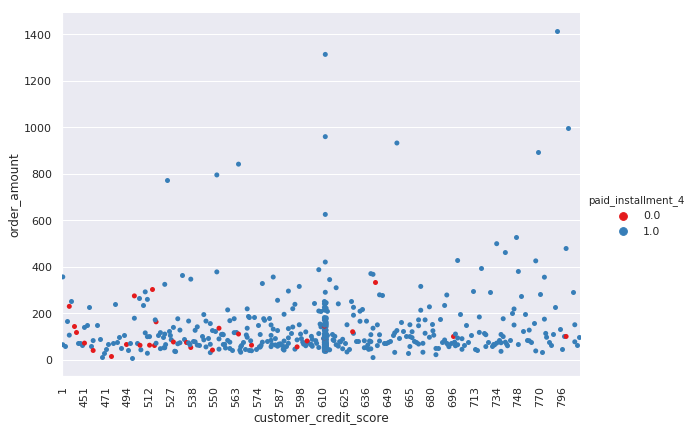

In [125]:


# fig, ax = plt.subplots(figsize=(10,10))
# sns.catplot(x="merchant_id", y="order_amount", hue="paid_installment_1", kind="swarm", data=df, ax=ax)

# seaborn.countplot(x="order_amount", y=None, hue="paid_installment_1", data=df) 



p = sns.catplot(
    x="customer_credit_score", 
    y="order_amount", 
    hue="paid_installment_4", 
    kind="swarm", 
    data=df.sample(500),
    height=6,
    aspect=1.4/1,
    palette="Set1"
)
p.set_xticklabels(rotation=90, step=10)



In [ ]:
p = sns.catplot(
    x="customer_credit_score", 
    y="order_amount", 
    hue="paid_installment_3", 
    kind="swarm", 
    data=df.sample(500),
    height=6,
    aspect=1.4/1
)
p.set_xticklabels(rotation=90, step=10)



<br>

### View histogram

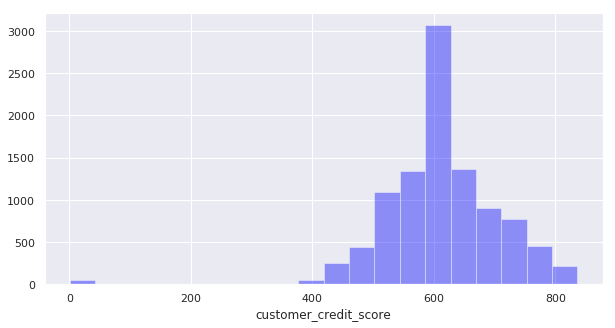

In [58]:
# https://seaborn.pydata.org/tutorial/distributions.html

def get_historgram(df, x, height=10, width=10, bins=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(height, width)
    p = sns.distplot(
        df[x], 
        bins=bins,
        kde=False,
        color='blue'
    )
    return p


In [62]:
# help(sns.distplot)

<br>

### View bar chart

In [104]:
merchant_count = pd.DataFrame(df.groupby('merchant_id').size())
merchant_count = merchant_count.reset_index()
merchant_count.columns = ['merchant_id', 'orders']
merchant_count = merchant_count.sort_values(by='orders', ascending=False)


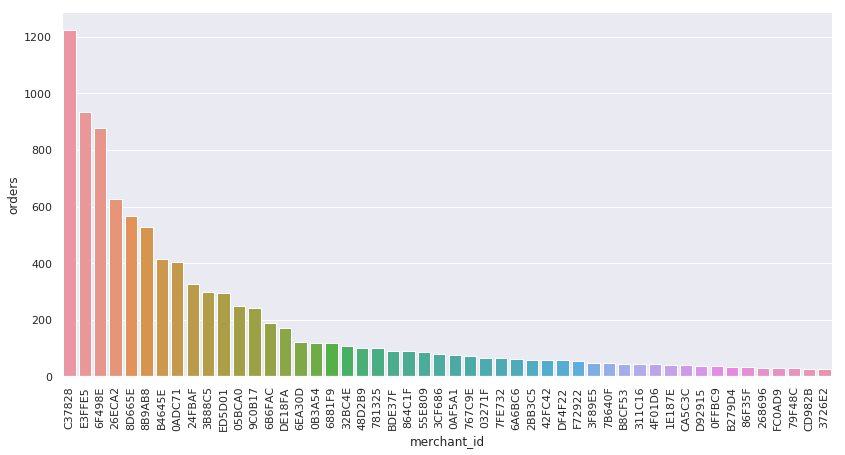

In [101]:

# sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

def get_bar_chart(df, x, y, height, width):
    p = sns.catplot(
        x=x, y=y, kind='bar',
        data=df,
        height=height,
        aspect=width/height
    )
    p.set_xticklabels(rotation=90, step=1)
    return p


<br>

### View boxplot

In [102]:

# top_merchants = [ h for h in df.merchant_id if h in list(top_merchants) ]


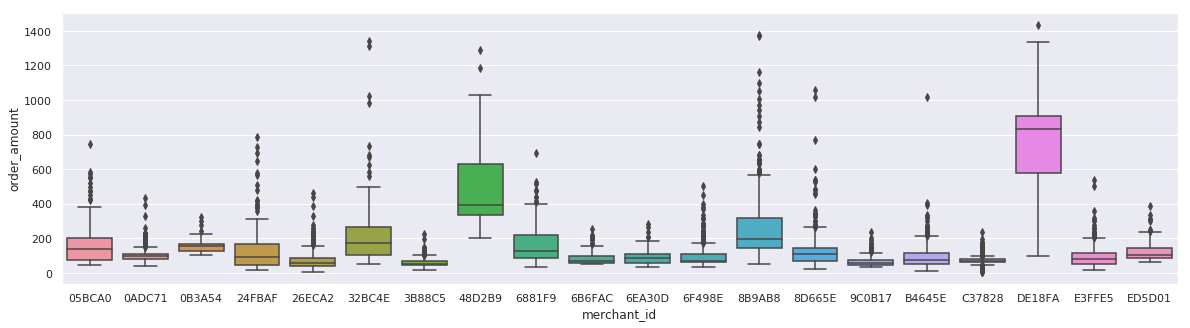

In [122]:

top_merchants = merchant_count.head(20)
top_merchants_orders = df[df['merchant_id'].isin(list(top_merchants.merchant_id))]


def get_boxplot(df, x, y, height=5, width=5):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    p = sns.boxplot(x=x, y=y, data=df)
    return p

